In [1]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 330.3 kB/s eta 0:00:02
   ------------- -------------------------- 204.8/614.7 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------- -------------------- 1.4/2.8 MB 28.5 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 28.2 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 25.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('tempdata.csv' ,index_col='date',parse_dates = True)
df =df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (12607, 1)


,temp
date,
1990-01-01,23.730
1990-01-02,23.505
1990-01-03,22.960
1990-01-04,22.190
1990-01-05,19.820


<Axes: xlabel='date'>

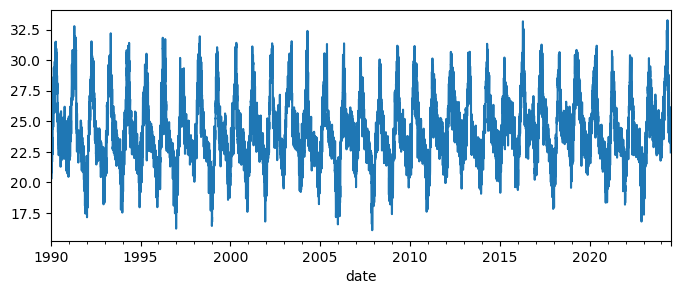

In [3]:
df['temp'].plot(figsize = (8,3))

In [46]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(df['temp'], autolag='AIC')

    print('\n 1.ADF:\n',dftest[0])
    print('\n 2.P-value:\n',dftest[1])
    print('\n 3.Num of lags\n',dftest[2])
    print("\n 4.Number of observation used for ADF Regression and Critical Values Calculation:\n",dftest[3])
    print("\n 5.Critical Values:")
    for key,val in dftest[4].items():
        print("\t",key, ":", val)

In [47]:
ad_test(df['temp'])


 1.ADF:
 -10.444399370631475

 2.P-value:
 1.4931118532660429e-18

 3.Num of lags
 41

 4.Number of observation used for ADF Regression and Critical Values Calculation:
 12565

 5.Critical Values:
	 1% : -3.430870544085656
	 5% : -2.8617700546933054
	 10% : -2.566892453128333


In [48]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
stepwise_fit = auto_arima(df['temp'], trace = True,suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32224.570, Time=2.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31895.723, Time=1.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31771.063, Time=2.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32222.570, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31207.241, Time=7.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31208.135, Time=10.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31208.186, Time=10.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=31459.621, Time=3.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31687.555, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=31205.242, Time=1.67 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=31769.063, Time=0.78 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=31893.723, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=31206.136, Time=2.36 sec
 ARIMA(1,1,2)(0,0,0)[0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                12607
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -15599.621
Date:                Thu, 11 Jul 2024   AIC                          31205.242
Time:                        01:25:57   BIC                          31227.567
Sample:                    01-01-1990   HQIC                         31212.713
                         - 07-07-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6016      0.014     42.742      0.000       0.574       0.629
ma.L1         -0.8337      0.010    -82.576      0.000      -0.854      -0.814
sigma2         0.6956      0.007    103.343      0.000       0.682       0.709
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              1397.16
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.42
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.tsa.arima.model import ARIMA

In [61]:
len(df)

12607

In [75]:
print(df.shape)
#training set shoul have 80% of len(df) and remaining 20% for test
train = df.iloc[:10086]
test =df.iloc[10086:]
print(train.shape,test.shape)

(12607, 1)
(10086, 1) (2521, 1)


In [76]:


model = ARIMA(train['temp'],order = (1,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                10086
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12510.891
Date:                Thu, 11 Jul 2024   AIC                          25027.782
Time:                        01:44:05   BIC                          25049.438
Sample:                    01-01-1990   HQIC                         25035.109
                         - 08-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6172      0.016     38.264      0.000       0.586       0.649
ma.L1         -0.8374      0.012    -72.109      0.000      -0.860      -0.815
sigma2         0.6999      0.008     91.675      0.000       0.685       0.715
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):              1035.55
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.40
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start,end = end,type = 'levels')
print(pred)
#pred.index =df.index[start:end+1]
#print(pred)

2017-08-13    23.922028
2017-08-14    24.102256
2017-08-15    24.213485
2017-08-16    24.282131
2017-08-17    24.324497
                ...    
2024-07-03    24.392792
2024-07-04    24.392792
2024-07-05    24.392792
2024-07-06    24.392792
2024-07-07    24.392792
Freq: D, Name: predicted_mean, Length: 2521, dtype: float64


<Axes: xlabel='date'>

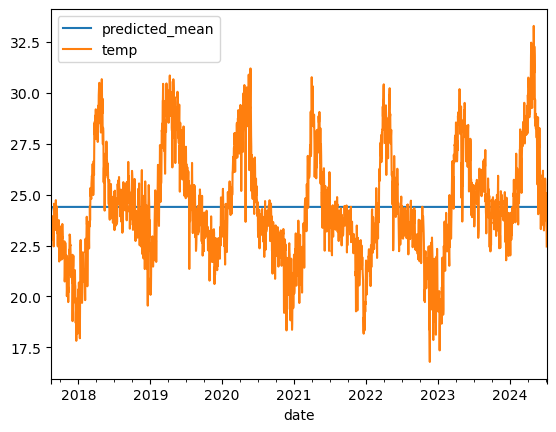

In [78]:
pred.plot(legend=True)
test ['temp'].plot(legend=True)

In [66]:
test['temp'].mean()

24.46455573185244

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

2.6373672319858223


In [68]:
model2 = ARIMA(df['temp'],order = (1,1,1))
model2 = model2.fit()
df.tail()

,temp
date,
2024-07-03,24.685
2024-07-04,24.160
2024-07-05,23.725
2024-07-06,23.745
2024-07-07,22.450


In [69]:
index_future_dates = pd.date_range(start = '2024-07-09',end = '2024-07-09')
pred = model2.predict(start = len(df),end = len(df)+30,type = 'levels').rename('ARIMA Prediction')
#pred.index = index_future_dates
print(pred)

2024-07-08    22.878146
2024-07-09    23.135723
2024-07-10    23.290684
2024-07-11    23.383911
2024-07-12    23.439996
2024-07-13    23.473738
2024-07-14    23.494038
2024-07-15    23.506250
2024-07-16    23.513597
2024-07-17    23.518017
2024-07-18    23.520676
2024-07-19    23.522276
2024-07-20    23.523239
2024-07-21    23.523818
2024-07-22    23.524166
2024-07-23    23.524376
2024-07-24    23.524502
2024-07-25    23.524578
2024-07-26    23.524623
2024-07-27    23.524651
2024-07-28    23.524667
2024-07-29    23.524677
2024-07-30    23.524683
2024-07-31    23.524687
2024-08-01    23.524689
2024-08-02    23.524690
2024-08-03    23.524691
2024-08-04    23.524691
2024-08-05    23.524692
2024-08-06    23.524692
2024-08-07    23.524692
Freq: D, Name: ARIMA Prediction, dtype: float64


<Axes: >

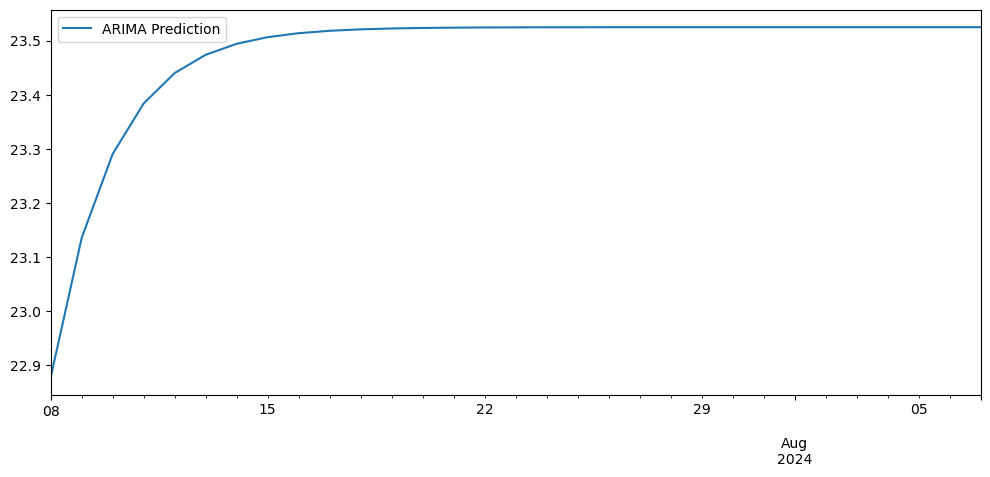

In [70]:
pred.plot(figsize=(12,5),legend=True)